### Prepare a classification model using Naive Bayes for salary data    
      
Data Description:  
     
age -- age of a person  
workclass	-- A work class is a grouping of work    
education	-- Education of an individuals	    
maritalstatus -- Marital status of an individulas	        
occupation	 -- occupation of an individuals        
relationship -- 	          
race --  Race of an Individual                 
sex --  Gender of an Individual                                   
capitalgain --  profit received from the sale of an investment	       
capitalloss	-- A decrease in the value of a capital asset          
hoursperweek -- number of hours work per week	         
native -- Native of an individual      
Salary -- salary of an individual     
   

In [234]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [235]:
df=pd.read_csv('SalaryData_Train.csv')
mf=pd.read_csv('SalaryData_Test.csv')

In [236]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [237]:
df.isna().sum(),mf.isna().sum()


(age              0
 workclass        0
 education        0
 educationno      0
 maritalstatus    0
 occupation       0
 relationship     0
 race             0
 sex              0
 capitalgain      0
 capitalloss      0
 hoursperweek     0
 native           0
 Salary           0
 dtype: int64,
 age              0
 workclass        0
 education        0
 educationno      0
 maritalstatus    0
 occupation       0
 relationship     0
 race             0
 sex              0
 capitalgain      0
 capitalloss      0
 hoursperweek     0
 native           0
 Salary           0
 dtype: int64)

__NO NULL VALUES__

In [238]:

print('Data type of Traning Dataset')
print(df.dtypes )
print()
print('Data type of Testng Dataset')

print(mf.dtypes)


Data type of Traning Dataset
age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

Data type of Testng Dataset
age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object


In [239]:
cat_df=[col for col in df.columns if (df[col].dtype=='object')]
num_df=[col for col in df.columns if (df[col].dtype=='int64')]
cat_mf=[col for col in df.columns if mf[col].dtype=='object']
num_mf=[col for col in df.columns if mf[col].dtype=='int64']

In [240]:
print('Categorical features in train data')
print(cat_df)
print()
print('Categorical features in test data')
print(cat_mf)
print()
print('************************************************')
print()
print('Numerical features in train data')
print(num_df)
print()
print('Numerical features in test data')
print(num_mf)


Categorical features in train data
['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

Categorical features in test data
['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

************************************************

Numerical features in train data
['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

Numerical features in test data
['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


__CATEGORICAL AND NUMERICAL DATATYPES ARE PRESENT IN DATA__


__All the Categories in each categorical features__ 

In [241]:
for i in cat_df:
    print('*********************************')
    print('\033[1m'+ i + '\033[0m')
    print(df[i].value_counts())
    print('-------')
    print(mf[i].value_counts())
    print('___________________________________________')
    print('Number of types in train data  :  ' + str(len(df[i].unique())))
    print('Number of types in test data   :  ' + str(len(mf[i].unique())))
    print('___________________________________________')
    print()

*********************************
workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
-------
 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
___________________________________________
Number of types in train data  :  7
Number of types in test data   :  7
___________________________________________

*********************************
education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          2

 __From above data it is clear that the target value is imbalance__  
 Thier is know differnce in types of categories present in both train and test data set.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


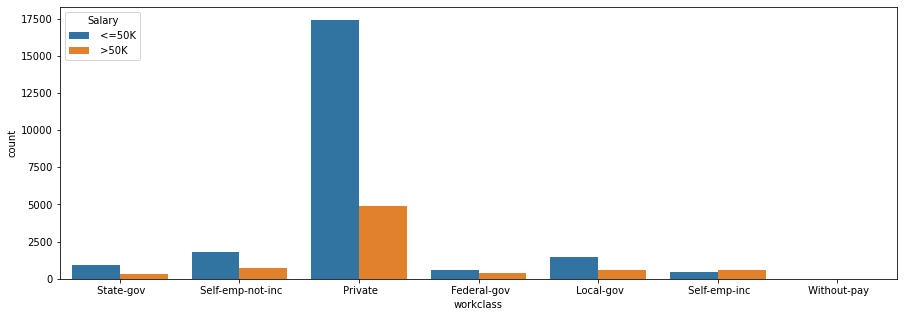

Sub-category having the highest number of person having salary above <=50 
 Private    22285
Name: workclass, dtype: int64
Sub-category having the lowest number of person having salary above <=50 
 Without-pay    14
Name: workclass, dtype: int64



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


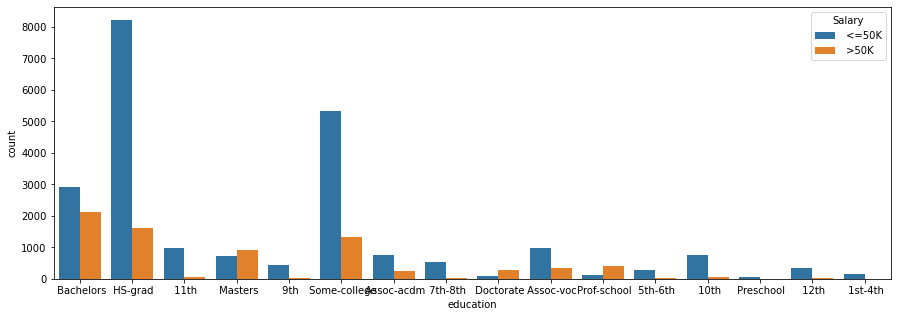

Sub-category having the highest number of person having salary above <=50 
 HS-grad    9840
Name: education, dtype: int64
Sub-category having the lowest number of person having salary above <=50 
 Preschool    45
Name: education, dtype: int64



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


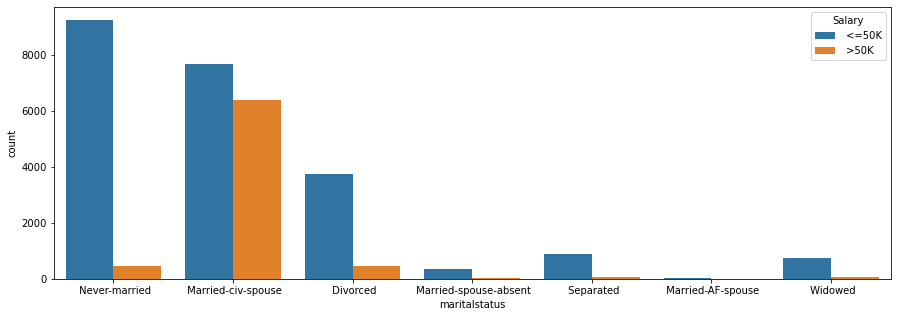

Sub-category having the highest number of person having salary above <=50 
 Married-civ-spouse    14065
Name: maritalstatus, dtype: int64
Sub-category having the lowest number of person having salary above <=50 
 Married-AF-spouse    21
Name: maritalstatus, dtype: int64



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


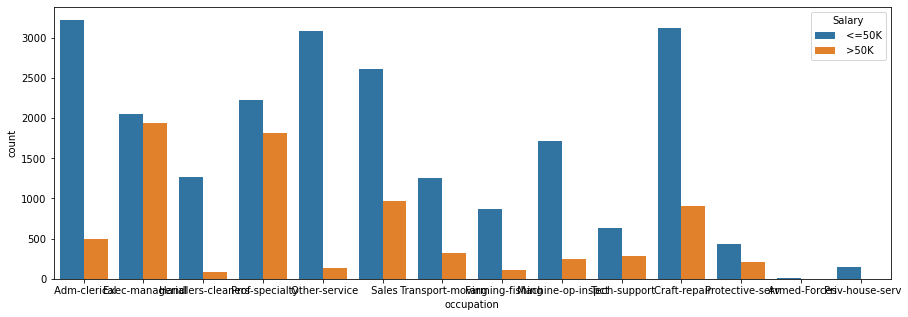

Sub-category having the highest number of person having salary above <=50 
 Prof-specialty    4038
Name: occupation, dtype: int64
Sub-category having the lowest number of person having salary above <=50 
 Armed-Forces    9
Name: occupation, dtype: int64



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


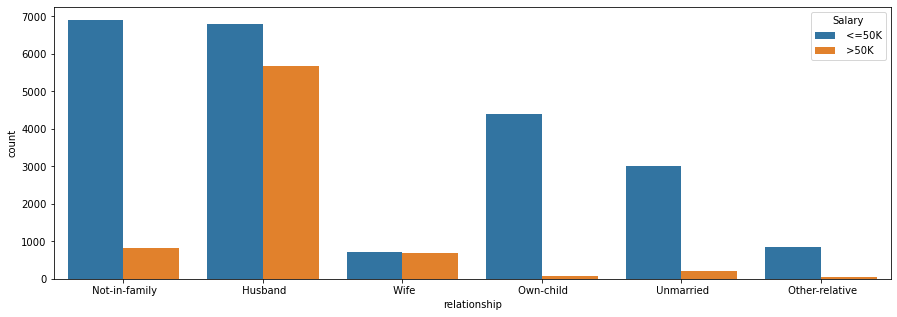

Sub-category having the highest number of person having salary above <=50 
 Husband    12463
Name: relationship, dtype: int64
Sub-category having the lowest number of person having salary above <=50 
 Other-relative    888
Name: relationship, dtype: int64



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


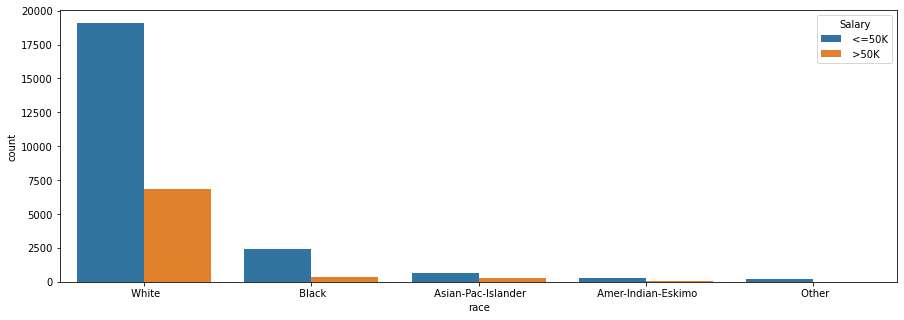

Sub-category having the highest number of person having salary above <=50 
 White    25932
Name: race, dtype: int64
Sub-category having the lowest number of person having salary above <=50 
 Other    231
Name: race, dtype: int64



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


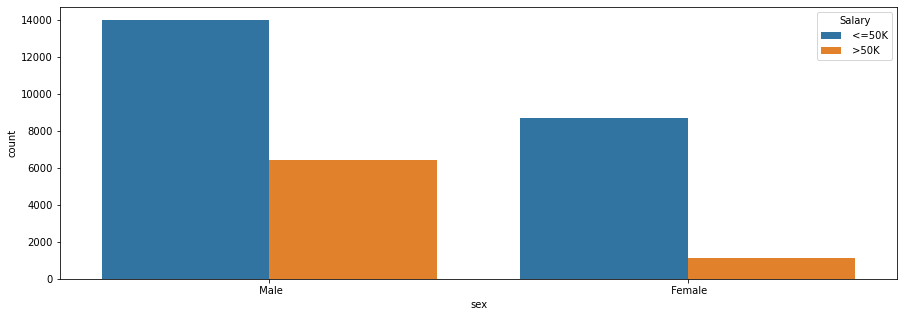

Sub-category having the highest number of person having salary above <=50 
 Male    20380
Name: sex, dtype: int64
Sub-category having the lowest number of person having salary above <=50 
 Female    9781
Name: sex, dtype: int64



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


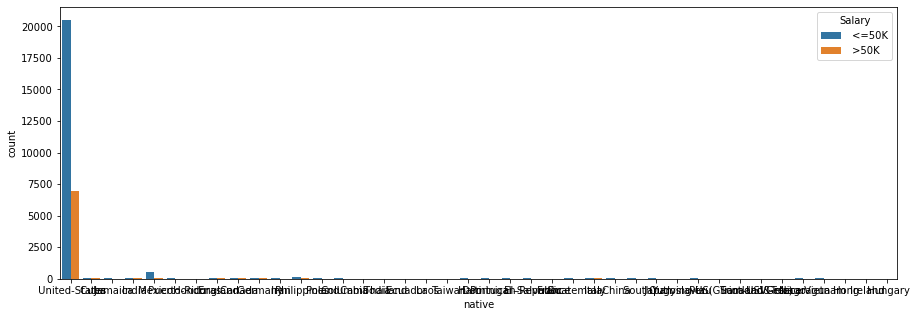

Sub-category having the highest number of person having salary above <=50 
 United-States    27504
Name: native, dtype: int64
Sub-category having the lowest number of person having salary above <=50 
 Scotland    11
Name: native, dtype: int64



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


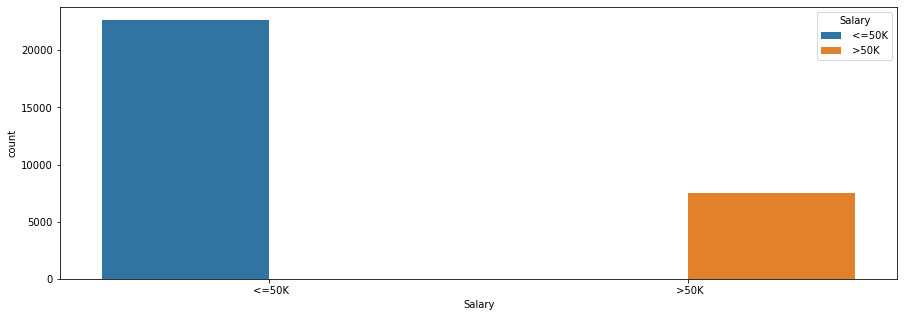

Sub-category having the highest number of person having salary above <=50 
 <=50K    22653
Name: Salary, dtype: int64
Sub-category having the lowest number of person having salary above <=50 
 >50K    7508
Name: Salary, dtype: int64



In [242]:
for i in cat_df:
    plt.figure(figsize=(15,5))
    sns.countplot(df[i],hue=df['Salary'])
    plt.show()
    print('\033[1m'+'Sub-category having the highest number of person having salary above <=50 ' +'\033[0m')
    print( df[i].value_counts().head(1))
    print('\033[1m'+'Sub-category having the lowest number of person having salary above <=50 ' +'\033[0m')
    print( df[i].value_counts().tail(1)  )
    print()

# Data Preprocessing

__Label Encoding__

In [243]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [244]:
# Label Encoding of Traing data
for i in cat_df:
    df[i]=le.fit_transform(df[i])


# Label Encoding of Test data
for i in cat_mf:
    mf[i]=le.fit_transform(mf[i])

__On getting Dummies variable the accuracy of the model increased__

In [245]:
df = pd.get_dummies(df, columns=cat_df,drop_first=True)
mf=pd.get_dummies(mf,columns=cat_mf,drop_first=True)

__MinMaxscaler__

In [246]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [247]:
# MinMaxScaler on Traing data
df.loc[:,num_df]=mms.fit_transform(df.loc[:,num_df])


# MinMaxScaler on of Test data
mf.loc[:,num_mf]=mms.fit_transform(mf.loc[:,num_mf])

__Tried MinMaxScaler But it reduced the accuracy of our model__

In [248]:
df.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,Salary_1
0,0.301370,0.800000,0.02174,0.0,0.397959,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.452055,0.800000,0.00000,0.0,0.122449,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.533333,0.00000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.493151,0.400000,0.00000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.150685,0.800000,0.00000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
mf.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,Salary_1
0,0.109589,0.400000,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.287671,0.533333,0.000000,0.0,0.500000,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.150685,0.733333,0.000000,0.0,0.397959,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.369863,0.600000,0.076881,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.232877,0.333333,0.000000,0.0,0.295918,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [250]:
xtrain=df.iloc[:,:-1]
ytrain=df.iloc[:,-1]

In [251]:
xtest=mf.iloc[:,:-1]
ytest=mf.iloc[:,-1]

__Balancing Imbalance data for only Training dataset__

In [252]:
## RandomOverSampler to handle imbalanced data

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
xtrain_new, ytrain_new = os.fit_sample(xtrain, ytrain)

In [253]:
xtrain.shape,ytrain.shape

((30161, 94), (30161,))

In [254]:
xtrain_new.shape,ytrain_new.shape

((45306, 94), (45306,))

In [255]:
print('Original dataset shape {}'.format(Counter(ytrain)))
print('Resampled dataset shape {}'.format(Counter(ytrain_new)))

Original dataset shape Counter({0: 22653, 1: 7508})
Resampled dataset shape Counter({0: 22653, 1: 22653})


__Tried Oversampling the data But the accuracy of the model decreased.__

# Naive Bayes Model

In [256]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

seed = 7

kfold = KFold(n_splits=10, random_state=seed)
cart =MB()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, xtrain, ytrain, cv=kfold)
print(results.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.8182093358677486


__Using Balanced data set__

In [257]:
# Preparing a naive bayes model on training data set 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(xtrain_new,ytrain_new)

train_pred_m = classifier_mb.predict(xtrain_new)
accuracy_train_m = np.mean(train_pred_m==ytrain_new)
print(accuracy_train_m)

test_pred_m = classifier_mb.predict(xtest)
accuracy_test_m = np.mean(test_pred_m==ytest) 
print(accuracy_test_m)

print(confusion_matrix(ytest,test_pred_m))
print(classification_report(ytest,test_pred_m))

0.792301240453803
0.7666002656042497
[[8423 2937]
 [ 578 3122]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83     11360
           1       0.52      0.84      0.64      3700

    accuracy                           0.77     15060
   macro avg       0.73      0.79      0.73     15060
weighted avg       0.83      0.77      0.78     15060



__Using Imbalanced data set__

In [258]:
# Preparing a naive bayes model on training data set 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(xtrain,ytrain)

train_pred_m = classifier_mb.predict(xtrain)
accuracy_train_m = np.mean(train_pred_m==ytrain)
print(accuracy_train_m)

test_pred_m = classifier_mb.predict(xtest)
accuracy_test_m = np.mean(test_pred_m==ytest) 
print(accuracy_test_m)

print(confusion_matrix(ytest,test_pred_m))
print(classification_report(ytest,test_pred_m))

0.8188057425151686
0.8185922974767597
[[9952 1408]
 [1324 2376]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     11360
           1       0.63      0.64      0.63      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.76      0.76     15060
weighted avg       0.82      0.82      0.82     15060



# Multinomial Naive bayes model is having the highest accuracy among all the Model when the data is Standardized

__Using Gaussian Naive bayes__

In [259]:
# Gaussian Naive Bayes 
classifier_gb = GB()
classifier_gb.fit(xtrain,ytrain.values) # we need to convert tfidf into array format which is compatible for gaussian naive bayes
train_pred_g = classifier_gb.predict(xtrain)
accuracy_train_g = np.mean(train_pred_g==ytrain) 

test_pred_g = classifier_gb.predict(xtest)
accuracy_test_g = np.mean(test_pred_g==ytest)

print(confusion_matrix(ytest,test_pred_g))
print(classification_report(ytest,test_pred_g))

[[4933 6427]
 [ 219 3481]]
              precision    recall  f1-score   support

           0       0.96      0.43      0.60     11360
           1       0.35      0.94      0.51      3700

    accuracy                           0.56     15060
   macro avg       0.65      0.69      0.55     15060
weighted avg       0.81      0.56      0.58     15060



In [260]:
accuracy_train_g,accuracy_test_g

(0.561221444912304, 0.5586985391766268)

# Gaussian Naive bayes model is having the highest accuracy among all the Model when the data is not Standardized